<div style="border:solid Chocolate 2px; padding: 40px">

<b>Софья, привет!👋</b>

Меня зовут Александр Куимов, я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

# Определение возраста покупателей

## Описание проекта
Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя.

### Цель исследования
Построить модель, которая по фотографии определит приблизительный возраст человека.
### Ход исследования
1. Провести исследовательский анализ набора фотографий.
2. Подготовить данные к обучению.
3. Обучить нейронную сеть и рассчитать её качество.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Вижу твое добавленное описание проекта. Молодец! Это поможет тебе расставлять акценты в выводах.

## Исследовательский анализ данных

Импортирую все необходимые библиотеки для реализации исследования проекта.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
 Молодец, что собираешь импорты в одну ячейку и помещаешь ее в начале проекта!

In [2]:
data = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
data.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


В датасете две колонки с данными

- file_name - наименование изображения в формате jpg
- real_age - возраст человека на изображении

In [4]:
data.shape

(7591, 2)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Размер выборки выведен. Можно тут еще добавить несколько слов, большая ли она, и как это скажется при обучении модели.

Чтобы справиться с таким объёмом изображений, к работе подключают динамическую загрузку данных.
В библиотеке Keras есть удобный загрузчик ImageDataGenerator. Из фотографий в папках класс ImageDataGenerator формирует батчи с изображениями и метками классов.

In [5]:
datagen = ImageDataGenerator(rescale=1./255)
datagen_flow = datagen.flow_from_dataframe(
        dataframe=data,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(150,150),
        class_mode='raw',
        batch_size=16,
        seed=12345)

Found 7591 validated image filenames.


 <br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>

</b> Ячейка выше не отработала. Перед отправкой проекта стоит проверять работоспособность кода - это можно сделать, нажав на панели Jupiter Hub `Kernel` и `Restart & Run All`. Исправь, пожалуйста.


<h2> Комментарий студента <a class="tocSkip"> </h2>

Исправила наименование датафрейма на корректный, ячейка отработала.👍 
</div>

- **target_size=(150, 150)** — аргумент с шириной и высотой, к которым будут приводиться изображения. В папках могут лежать изображения разного размера, а нейронным сетям нужно, чтобы все изображения были одинаковые.
- **batch_size=16** — количество изображений в батче. Чем больше изображений, тем лучше обучится сеть. Много фотографий в памяти GPU не поместится, поэтому 16 — это золотая середина, с которой можно стартовать.
- **сlass_mode='raw'** — аргумент, который указывает тип выдачи метки классов. raw - значит метки классов остаются неизменными из датасета (возраст.


<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Вижу, хорошо.

Пары «картинки — метки» можно получить функцией next().

In [6]:
features, target = next(datagen_flow)

In [7]:
features.shape

(16, 150, 150, 3)

Получили признаки — четырёхмерный тензор, в котором 16 изображений размером 150x150 с тремя цветовыми каналами.

Построю график распределения возраста в выборке. С помощью библиотеки matplotlib визуализирую распредление количества человек на возраст.

Text(0.5, 1.0, 'Распределение возраста в выборке')

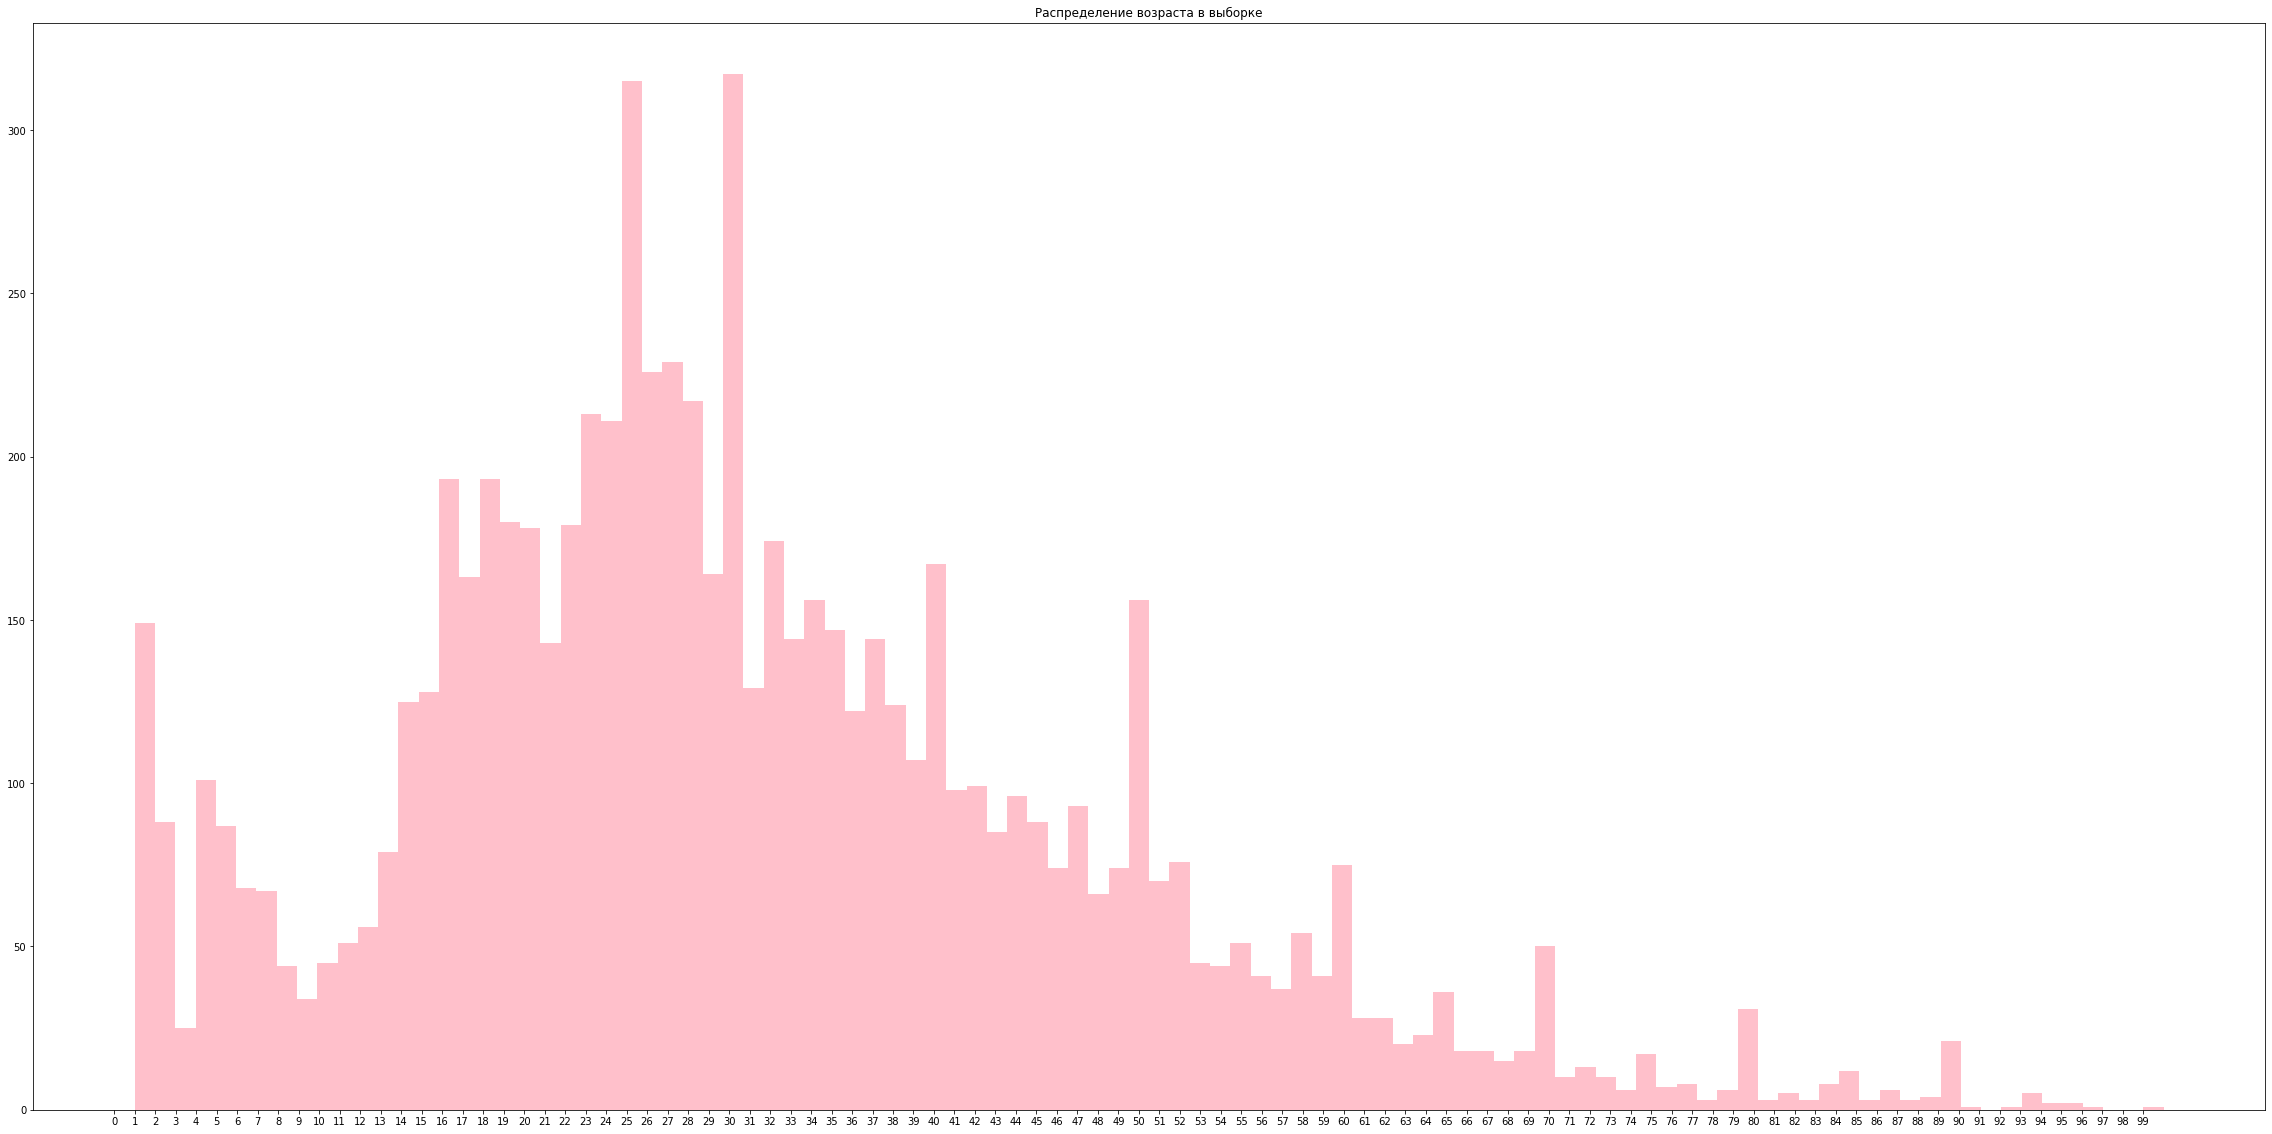

In [8]:
plt.figure(figsize=(40, 20))
plt.hist(data['real_age'], bins=100, color='pink')
plt.xticks(np.arange(0, 100, step=1))
plt.title("Распределение возраста в выборке")

По графику видно, что большинство людей в датасете находятся в возрасте от 20 до 30 лет. Далее количество людей на возраст уменьшается, людей пожилого возраста совсем немного. Так же детей с 5 до 12 лет совсем мало.
Распределение графика похоже на простое, однако со смещением. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Гистограмма целевого признака выведена. Раз у нас 100 различных возрастов, то и корзин можно указать столько же.
        
Неплохо тут еще добавить, похоже ли распределение на простые, имеются ли "кластеры" и выбросы.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>

- Тут скорее не похоже на простые распределения,  наше распределение имеет "кластеры", также есть выбросы и наблюдается "бимодальность". Распределение у нас смещено вправо, хвост справа (right-skewed distribution).
- Выбросы тут могут быть связаны с тем, что настоящий возраст был неизвестен тому, кто размечал датасет, и он его попросту округлял до "юбилейных" лет. Поэтому, некоторые "круглые" года в датасете некорректные. 

Выведу несколько изображений, чтобы посмотреть, что находится в датасете.

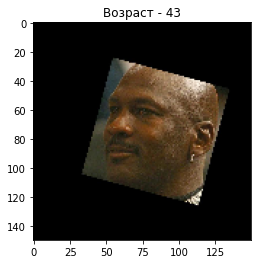

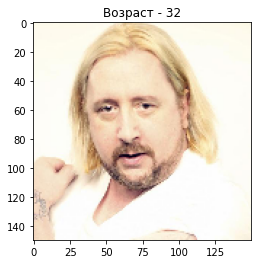

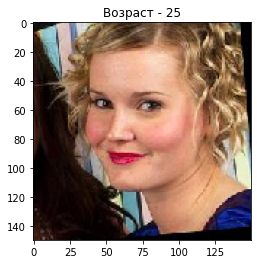

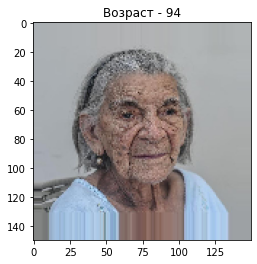

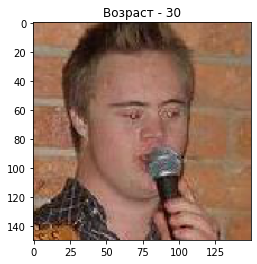

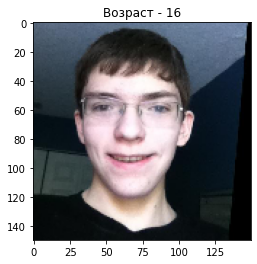

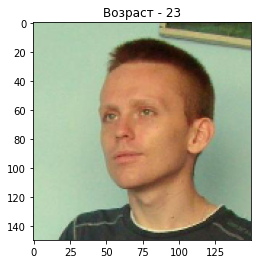

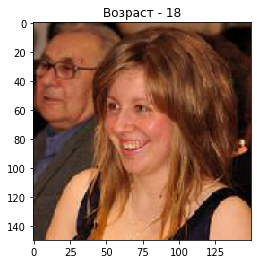

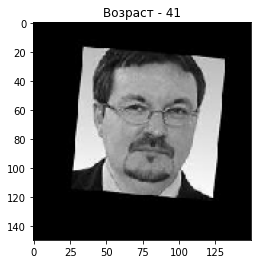

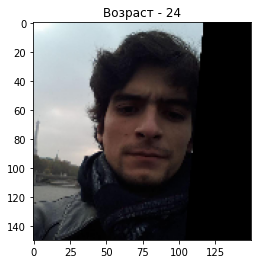

In [9]:
x,y = datagen_flow.next()
for i in range(0,10):
    image = x[i]
    plt.imshow(image)
    plt.title(f'Возраст - {y[i]}')
    plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Примеры фотографий выведены!
    
Можно еще поработать над оформлением графика с фото (название осей и самого графика, а также размер).

Из выборки выведенных изображений видно, что некоторые изображения цветные, некоторые черно-белые. Так же присутствуют повороты изображений. В целом, общая ориентация фотографий прямая, несколько фотографий с уменьшенным изображением и с поворотом.

Перейду к обучению модели для определения возраста человека. В качестве функции потерь в данной задаче буду использовать Mean Absolute Error, так как это возможная функция потерь для задачи регрессии. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Анализ проведен корректно.
        
Тут неплохо еще будет указать в выводе, какова общая ориентация фотографий (нужно ли их поворачивать), различается ли размер изображений?
Добавь, пожалуйста.
 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Общая ориентация фотографий примерно одинакова - в некоторых фото их уже повернули за нас, чтобы выровнять положение лица, значит нам их не обязательно поворачивать, а размер изображений мы приведем к единому перед обучением модели.

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
 
def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(
        validation_split=0.25,
        horizontal_flip=True,
 
        rescale=1./255)
 
    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)
 
    return train_gen_flow
 
def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25,rescale=1./255)
 
    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory= path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)
 
 
    return test_gen_flow
 
def create_model(input_shape):
    optimizer = Adam(lr=0.0001)
    backbone = ResNet50(input_shape=(224,224,3),
                    weights='imagenet',
                    include_top=False) 
 
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=optimizer, loss='mse',
                  metrics=['mae'])
    return model    
 
def train_model(model, train_data, test_data,
                steps_per_epoch =None,
                validation_steps= None, batch_size=None, epochs=9):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    model.fit(train_data,
              validation_data=test_data,
              steps_per_epoch= steps_per_epoch,
              validation_steps= validation_steps,
              verbose=2, batch_size=batch_size, epochs=epochs,
              shuffle=True)
    return model

```

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

Модель определена правильно!
        
Cейчас у тебя созданы генераторы с одинаковым именем. Желательно создать отдельные генераторы с разными именами. Так будет лучше читаемость кода.

```
Train for 356 steps, validate for 119 steps
Epoch 1/9
2022-07-05 20:39:48.064294: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-07-05 20:39:48.375105: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
356/356 - 121s - loss: 194.1627 - mae: 10.1702 - val_loss: 844.2093 - val_mae: 24.1595
Epoch 2/9
Epoch 3/9
356/356 - 39s - loss: 82.7805 - mae: 6.9308 - val_loss: 207.4354 - val_mae: 11.5188
356/356 - 38s - loss: 57.4888 - mae: 5.7880 - val_loss: 87.4118 - val_mae: 7.2100
Epoch 4/9
356/356 - 39s - loss: 41.4856 - mae: 4.9204 - val_loss: 90.4048 - val_mae: 7.0591
Epoch 5/9
356/356 - 39s - loss: 31.1215 - mae: 4.2632 - val_loss: 76.4706 - val_mae: 6.4851
Epoch 6/9
356/356 - 39s - loss: 25.8395 - mae: 3.8495 - val_loss: 72.7345 - val_mae: 6.4292
Epoch 7/9
356/356 - 39s - loss: 20.7926 - mae: 3.4666 - val_loss: 78.9599 - val_mae: 6.5510
Epoch 8/9
356/356 - 40s - loss: 17.3258 - mae: 3.1459 - val_loss: 68.0855 - val_mae: 6.1282
Epoch 9/9
356/356 - 40s - loss: 14.7885 - mae: 2.9221 - val_loss: 65.7139 - val_mae: 6.0242
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 10s - loss: 65.7139 - mae: 6.0242
Test MAE: 6.0242

```

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отличный результат по метрике за 9 эпох)

## Анализ обученной модели

В модели была использована архитектура ResNet50. ResNet — это глубокая сеть, которая применяет skip-connections, свёртки небольшого размера и bottleneck-блоки. На большинстве задач она работает лучше других архитектур. Число в названии означает, сколько в сети слоёв - здесь 50. Чтобы подбор шага был автоматическим, применяю алгоритм Adam, он подбирает различные параметры для разных нейронов, что также ускоряет обучение модели. Шаг указан 0.0001 для более точного результата. В модели 2 слоя - GlobalAveragePooling2D,Dense(units=1, activation='relu'). Метрика функции потерь - mean absolute error, так как решаю задачу регрессии. Размер эпох взяла 9, чтобы модель обучалась не слишком долго, но при этом показала хороший результат.

На валидационной выборке функция потерь оказалась равна 6,0242. Данное значение метрики приемлимо, так как необходимо было преодлеть порог в значение 8. Это означает, что модель может ошибаться в среднем на 6 лет в определении возраста человека.

Возраст клиентов необходимо предсказыать, чтобы 
- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя.

Данное обучение модели поможет решить задачу №1, однако не подойдет для решения задачи №2, так как MAE 6 слишком высокое значение для данной задачи. Возрастной ценз для покупки алкоголя - 18 лет. Если человеку 16 лет, модель предскажет 22 года, то продажа алкоголя такому человеку незаконна.

Для задачи №1 так же можно определять не конкретный возраст покупателя, а когорту - разбить всех покупателей на группы (дети, подростки, пенсионеры итд.), но это уже будет задача классификации. Для обучения подойдет функция потерь - Cross-Entropy.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Пожалуйста, подробнее опиши использованную модель и параметры.


<h2> Комментарий студента <a class="tocSkip"> </h2>

Добавила описание своей модели.👍 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Выводы вполне логичные)

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Могу поделиться такими ссылками для углубленного изучения темы спринта:
    
- Видео от Stanford University: https://www.youtube.com/watch?v=vT1JzLTH4G4&list=PLC1qU-LWwrF64f4QKQT-Vg5Wr4qEE1Zxk
    
- Курс от Физтех-школы Прикладной Математики и Информатики МФТИ: https://vk.com/dlschool_mipt
    
- Курс Нейронные сети и компьютерное зрение от Sumsung: https://stepik.org/course/50352/promo#toc

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.1 <a class="tocSkip"> </h2>    
    
  
Софья,    
у меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с проектом. Молодец! Загружены данные для анализа, изучен каждый параметр, модель построена и протестирована. Тебе удалось успешно справиться с первой задачей в области компьютерного зрения. Поздравляю!
    
Отмечу отдельные положительные моменты проекта🙂:
    
- радует, что проект хорошо структурирован, приятно проверять такие работы;
- есть красивые визуализации в проекте.
    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть. 
Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства:

- Ячейка выше не отработала. Перед отправкой проекта стоит проверять работоспособность кода - это можно сделать, нажав на панели Jupiter Hub `Kernel` и `Restart & Run All`. Исправь, пожалуйста.
- Исправить выводы при необходимости.
    
Если будут вопросы, обращайся, с удовольствием на них отвечу.  
</div>


<h2> Комментарий студента <a class="tocSkip"> </h2>
    
   
Спасибо за ревью, Александр. Учла комментарии, добавила ряд исправлений.👍 
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.2 <a class="tocSkip"> </h2>    
    
     
  
Софья, пожалуйста! Теперь почти идеально, молодец! Принимаю твой проект)
    
    
В этом проекте все шаги отработаны. С интересом читал твои размышления, код и выводы. Что ещё для дальнейшего улучшения качества возможно сделать?
    
Опишу здесь некоторые идеи:
    
1. Качество данных на входе: оценить еще раз возраст по фото, возможно в выборке есть выбросы.
2. Анализ ошибок: к примеру модель сильно ошибается на сегменте пожилых людей, зато почти идеально работает с детьми. Тогда мы поймем, каких возрастов фото было бы хорошо добавить в выборку для дообучения.
3. Дополнительно изучить распределение целевого признака, возможно что выборка была составлена неслучайным образом (видна небольшая бимодальность), посмотреть, каких возрастных групп представлено мало, чтобы их потом добавить в выборку.
    
Но цель нашего проекта достигнута. Рад был тебе помочь)
    
Преподаватель в Slack будет рад помочь, если у тебя появятся вопросы. Удачи тебе в финальном проекте!
  
</div>